In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [5]:
Classified_data = pd.read_csv("knn_Classified_data.csv",index_col = 0)

In [6]:
Classified_data.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


# STANDARDIZATION

In [9]:
from sklearn.preprocessing import StandardScaler

In [12]:
StandardScal = StandardScaler()

In [13]:
StandardScal.fit(Classified_data.drop('TARGET CLASS',axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [15]:
Scaled_features = StandardScal.transform(Classified_data.drop('TARGET CLASS',axis = 1))

In [17]:
Classified_data_feat = pd.DataFrame(Scaled_features,columns=Classified_data.columns[:-1])
Classified_data_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


# KNN MODEL BUILDING

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,Y_train,Y_test = train_test_split(Classified_data_feat,Classified_data['TARGET CLASS'],test_size=0.3, random_state=42)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn = KNeighborsClassifier(n_neighbors=1)

In [22]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [25]:
prediction = knn.predict(X_test)

# EVALUTION METRICS

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
print(confusion_matrix(prediction,Y_test))

[[134  11]
 [  8 147]]


In [28]:
print(classification_report(prediction,Y_test))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       145
           1       0.93      0.95      0.94       155

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



# CHOOSING A K-VALUE

In [33]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,Y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != Y_test))

In [38]:
error_rate

[0.06333333333333334,
 0.08333333333333333,
 0.056666666666666664,
 0.056666666666666664,
 0.056666666666666664,
 0.056666666666666664,
 0.06333333333333334,
 0.056666666666666664,
 0.056666666666666664,
 0.05,
 0.05,
 0.04666666666666667,
 0.04666666666666667,
 0.04666666666666667,
 0.04666666666666667,
 0.04666666666666667,
 0.04666666666666667,
 0.05,
 0.05333333333333334,
 0.05333333333333334,
 0.05,
 0.056666666666666664,
 0.056666666666666664,
 0.05333333333333334,
 0.06,
 0.056666666666666664,
 0.05333333333333334,
 0.05333333333333334,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05]

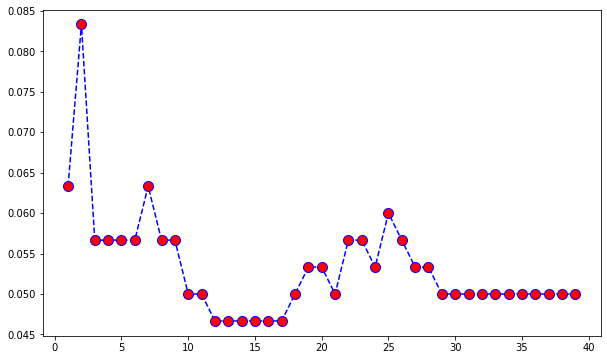

In [41]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize = 10)
#plt.title('Error Rate vs K Value')
#plt.xlabel("k")
#plt.ylabel("Error Rate")

In [45]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train,Y_train)
prediction = knn.predict(X_test)
print(confusion_matrix(prediction,Y_test))
print(classification_report(prediction,Y_test))

[[136   8]
 [  6 150]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       144
           1       0.95      0.96      0.96       156

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

